**Group Contributions Statement:**

All three of us worked on data import, cleaning and feature selection.
Han created Table 1 and Graph 1, Nitya made Graph 2 and Graph 3, Aanya coded graph 4 and added descriptions for all the figures.
Aanya created the Logistic Regression model, Han created the Support Vector Machine model and Nitya created the K-Nearest Neighbors model.
We all worked on the conclusion together and checked each other’s work.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing
url = 'https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv'
penguins = pd.read_csv(url)
penguins
np.random.seed(3354354524)

In [ ]:
# Splitting data into train and test
train, test = train_test_split(penguins, test_size = 0.2)

In [ ]:
# Checking shape
penguins.shape

(344, 17)

In [ ]:
#Checking uniqueness of variables
rel_cols = ['Region','Island','Sex','Stage']
for i in rel_cols:
    print('Unique value of ' + str(i) + " :" + str(penguins[i].unique()))

Unique value of Region :['Anvers']
Unique value of Island :['Torgersen' 'Biscoe' 'Dream']
Unique value of Sex :['MALE' 'FEMALE' nan '.']
Unique value of Stage :['Adult, 1 Egg Stage']


In [ ]:
#Dropping unecessary columns and cleaning "SEX" column
def drop(df):
    """
    Removes unnecessary columns and cleans up the "Sex" column in a penguins dataset.
    Parameters:
    df (pandas.DataFrame): The penguins dataset.
    Returns:
    pandas.DataFrame: The cleaned penguins dataset.

    """
    # removing irrelavent columns
    df_copy = df.copy()
    df_copy = df_copy.drop(['studyName','Sample Number','Individual ID',
                            'Date Egg','Clutch Completion','Comments','Region','Stage'], axis = 1)

    # dropping rows with NaNs and '.' for sex
    df_copy = df_copy.dropna(subset = ['Sex'])
    df_copy = df_copy[df_copy['Sex'] != '.']

    # shorten species name
    df_copy['Species'] = df_copy['Species'].str.split().str.get(0)

    return df_copy

In [ ]:
#applying the function on train and test data set
train = drop(train)
test = drop(test)
penguins = drop(penguins)

In [ ]:
def encoding(df):
  '''
  A function to convert the Strings for the Sex, Island and Species columns into
  integers for easier manipulation.
  Parameters:
    df- the dataframe we want to encode
  Returns:
    df_copy- the encoded copy of the passed dataframe, with Sex, Island, and
    Species values enumerated
  '''
  df_copy = df.copy()
  #replacing MALE and FEMALE with 0, 1
  le = preprocessing.LabelEncoder()
  df_copy['Sex'] = le.fit_transform(df_copy['Sex'])

  # replacing Island names with 0, 1, 2
  newIsland = {"Torgersen" : 0,
              "Biscoe" : 1,
             "Dream" : 2}
  df_copy["Island"] = df_copy["Island"].map(newIsland)

  #replacing Species Name with 0, 1, 2
  newSpecies = {"Adelie" : 0,
              "Chinstrap" : 1,
             "Gentoo" : 2}
  df_copy["Species"] = df_copy["Species"].map(newSpecies)
  return df_copy

In [ ]:
train = encoding(train)
test = encoding(test)

In [ ]:
train.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
328,2,1,43.3,14.0,208.0,4575.0,0,8.42070,-26.38092
252,2,1,45.1,14.5,207.0,5050.0,0,7.97408,-25.53768
120,0,0,36.2,17.2,187.0,3150.0,0,9.04296,-26.19444
156,1,2,52.7,19.8,197.0,3725.0,1,9.00642,-24.61867
91,0,2,41.1,18.1,205.0,4300.0,1,8.77018,-25.83352


In [ ]:
#checking NaNs
train.isna().sum()

Species                0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      8
Delta 13 C (o/oo)      7
dtype: int64

In [ ]:
#dropping NaNs
train = train.dropna()

In [ ]:
train.isna().sum()

Species                0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

In [ ]:
test.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
313,2,1,49.5,16.1,224.0,5650.0,1,8.83352,-25.69195
41,0,2,40.8,18.4,195.0,3900.0,1,NaN,NaN
52,0,1,35.0,17.9,190.0,3450.0,0,8.19539,-26.17213
86,0,2,36.3,19.5,190.0,3800.0,1,8.57087,-26.22227
294,2,1,46.4,15.0,216.0,4700.0,0,8.47938,-26.95470


In [ ]:
#checking NaNs
test.isna().sum()

Species                0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      1
Delta 13 C (o/oo)      1
dtype: int64

In [ ]:
#dropping NaNs
test = test.dropna()

In [ ]:
penguins = penguins.dropna()

**Table 1: Averages of the variables describing the penguin data set, grouped by species**

In [ ]:
# Summary Statistics to calculate the mean of each variables and round it to 2 decimal places
table = ((penguins.groupby(['Species']).mean()).round(2)).reset_index()
table

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
0,Adelie,38.79,18.32,190.32,3702.70,8.86,-25.81
1,Chinstrap,48.79,18.40,195.67,3729.85,9.36,-24.56
2,Gentoo,47.57,14.99,217.19,5091.10,8.25,-26.18


In [ ]:
sample_count = train['Species'].value_counts()
sample_count

0    108
2     96
1     54
Name: Species, dtype: int64

**Graph 1: A plot comparing all the quantitative variables with eachother using different colours to denote species.**

Text(0.5, 1.02, 'Plot of Quantitaive Features')

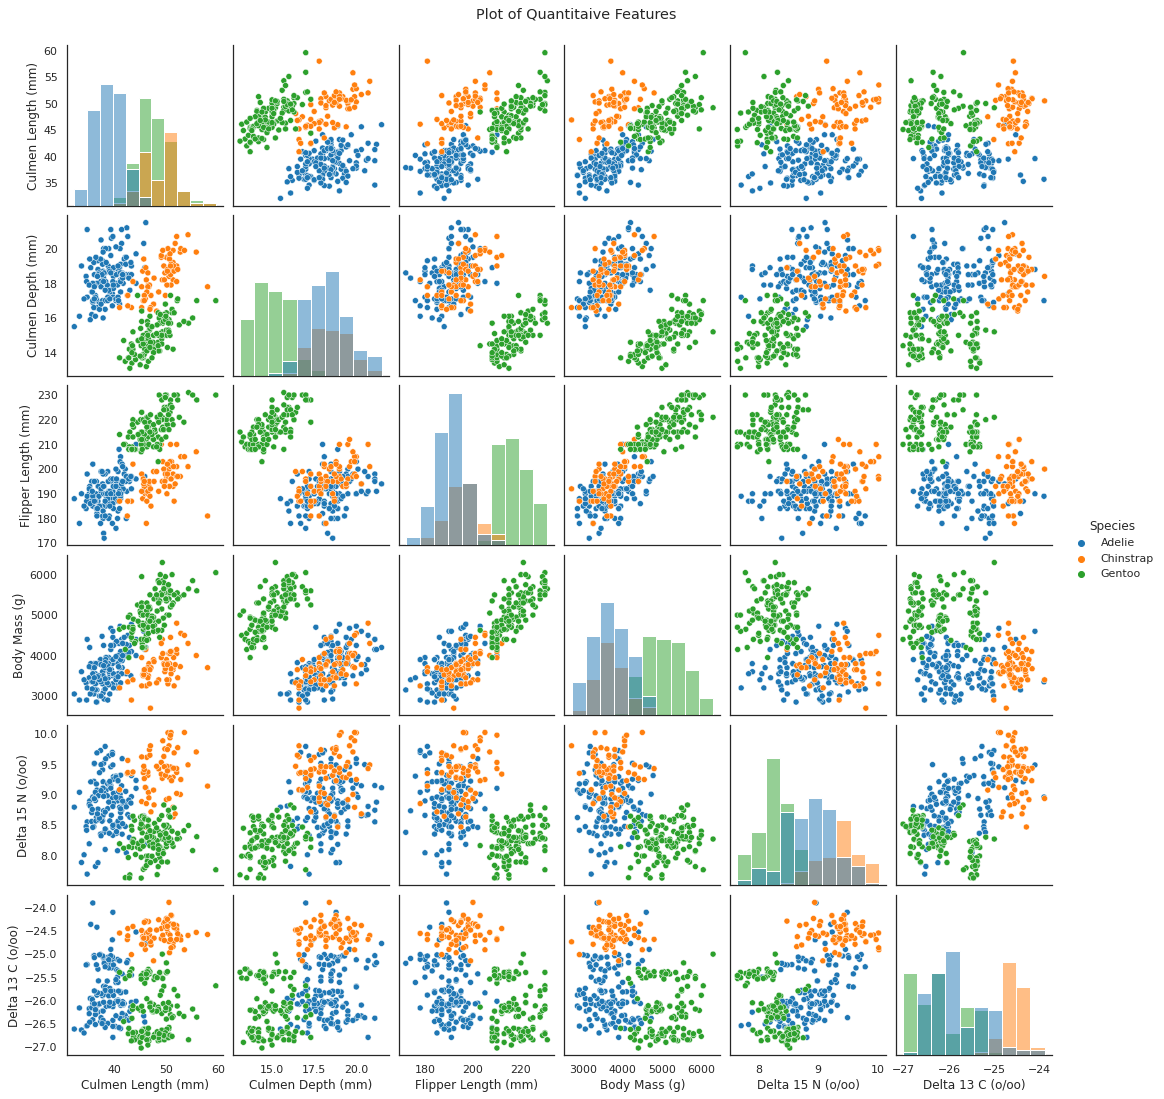

In [ ]:
sns.set(style = 'white', font_scale = 1)
sns.set_palette(sns.color_palette("tab10"))

fig1 = sns.pairplot(data = penguins, hue = "Species", diag_kind="hist")
fig1.fig.suptitle('Plot of Quantitaive Features' , y = 1.02)

**Description:**

This graph helps us visualise the relationship between the different variables for each species. It compares every feature with itself and the other features as well. Each individual graph in the grid has 3 different plots to represent the 3 species.

This graph allows us to see a summary of all the possible combinations of the features and its relationship with the species. The goal of using this graph is to derive more specific graphs in order to select features that are able to destinguish between the 3 species best.

**Graph 2: A bar plot that compares the islands with average flipper length grouped by species**  

<ipython-input-20-d297c515fca7>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  fgrid = sns.catplot(x= "Island", y = "Flipper Length (mm)", data = penguins, hue="Species", kind = "bar", ci = None, height = 8, hue_order = hue_order)


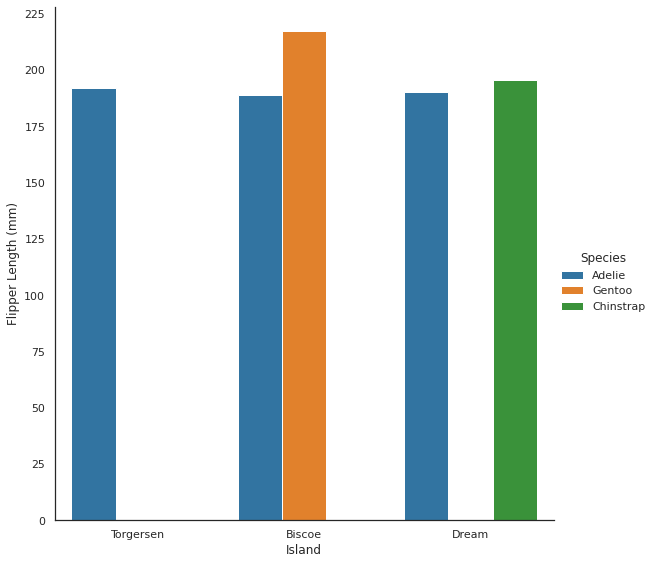

In [ ]:
hue_order = ['Adelie', 'Gentoo', 'Chinstrap']

fgrid = sns.catplot(x= "Island", y = "Flipper Length (mm)", data = penguins, hue="Species", kind = "bar", ci = None, height = 8, hue_order = hue_order)
plt.yticks(range(0, 250, 25))

plt.show()

**Description:**

This bar graph plots Island against Flipper Length grouping the
data by Species. This graph tells us that in the Torgersen Island, we only find Adelie. Biscoe and Dream islands have 2 species each. Adelie is present on all 3 islands. Gentoo is only on Biscoe and Chinstrap is only on Dream.


**Graph 3: A Bar graph grid comparing flipper length, sex and species**

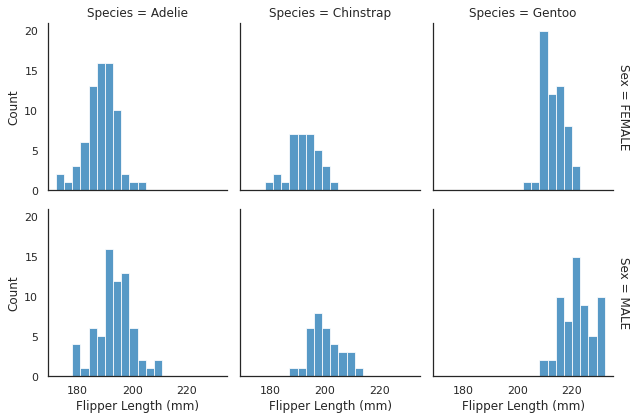

In [ ]:
sns.displot(
    data=penguins, x="Flipper Length (mm)", col="Species", row="Sex",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

**Description:**

This graph tells us that the penguins from Gentoo have the highest flipper length for both males and females. The penguins from Adelie have the lowest flipper length for both males and females. The penguins from Chinstrap have average flipper length for both males and females but they have the lowest count of penguins for males and females.

**Graph 4: A scatterplot comparing Culmen Length and Culmen Depth grouped by species.**

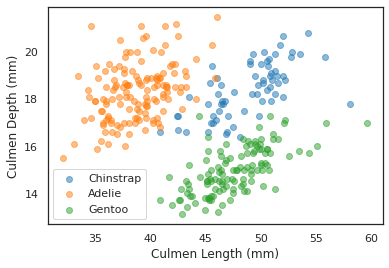

In [ ]:
fig, ax = plt.subplots(1)
# create a set of unique species combinations
penguins_species = set(penguins["Species"])

# loop through each combination of species location
for species in penguins_species:
    subspecies = penguins[(penguins['Species'] == species)]
    if not subspecies.empty:
        label = f"{species.split()[0]}"
        ax.scatter(subspecies['Culmen Length (mm)'], subspecies['Culmen Depth (mm)'], label=label, alpha=0.5)

# add axis labels and legend
ax.set_xlabel("Culmen Length (mm)")
ax.set_ylabel("Culmen Depth (mm)")
ax.legend()

plt.show()

**Description:**

This graph shows how the relationship between Culmen Length and Culmen Depth changes for each of the species. It tells us that Gentoo penguins have the lowest Culmen Depth while Adelie penguins have the lowest Culmen Length. Chinstrap penguins have the highest combinations of Culmen Length and Culmen Depth.

The scatter plot shows us that the the 3 species are generally separate with regards to Culmen Length and Culmen Depth and there isn't muuch overlap. These characterstics make these features favourable to select to identify a penguin's species.

In [ ]:
train

,Species,Island,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
328,2,1,43.3,14.0,208.0,4575.0,0,8.42070,-26.38092
252,2,1,45.1,14.5,207.0,5050.0,0,7.97408,-25.53768
120,0,0,36.2,17.2,187.0,3150.0,0,9.04296,-26.19444
156,1,2,52.7,19.8,197.0,3725.0,1,9.00642,-24.61867
91,0,2,41.1,18.1,205.0,4300.0,1,8.77018,-25.83352
...,...,...,...,...,...,...,...,...,...
255,2,1,48.4,16.3,220.0,5400.0,1,8.03659,-26.86127
194,1,2,50.9,19.1,196.0,3550.0,1,10.02372,-24.86594
218,1,2,50.8,19.0,210.0,4100.0,1,9.98044,-24.68741
139,0,2,39.7,17.9,193.0,4250.0,1,9.25769,-25.88798


In [ ]:
X_train = train[["Island",	"Culmen Length (mm)",	"Culmen Depth (mm)",	"Flipper Length (mm)",	"Body Mass (g)",	"Sex",	"Delta 15 N (o/oo)",	"Delta 13 C (o/oo)"]]
Y_train = train["Species"]

X_test = test[["Island",	"Culmen Length (mm)",	"Culmen Depth (mm)",	"Flipper Length (mm)",	"Body Mass (g)",	"Sex",	"Delta 15 N (o/oo)",	"Delta 13 C (o/oo)"]]
Y_test = test["Species"]

In [ ]:
#Exhastive Search Feature Selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from itertools import combinations
def exhaustive_search(model, X, y, min_cols, max_cols):
  '''
  A function to select the best columns for predicting the species accurately.
  Parameters:
    model- the machine learning model used to make predictions
    X- the training dataframe without the species labels
    y- the dataframe containing the species labels
    min_cols- the minimum number of columns needed
    max_cols- the maximum number of columns needed
  Returns:
    best_cv- the best mean cross validation score for a combination of columns
    best_cols- the best combination of columns with the highest mean cv score
  '''
  best_cv = 0
  best_cols = None
  X_qual= ["Sex", "Island"]
  X_quant = X[["Culmen Length (mm)",	"Culmen Depth (mm)",	"Flipper Length (mm)",	"Body Mass (g)",	"Delta 15 N (o/oo)",	"Delta 13 C (o/oo)"]]
  for n_cols in range(min_cols, max_cols+1):
    for cols in combinations(X_quant.columns, n_cols):
      for i in range(0,2):
        c= cols + (X_qual[i],)
        cv = cross_val_score(model, X[list(c)], y, cv = 10).mean()
        if cv > best_cv:
            best_cv = cv
            best_cols = c
  return best_cv, best_cols

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter = 10000)

best_cv, best_cols = exhaustive_search(LR, X_train, Y_train, 2, 2)
best_cv, best_cols

(0.9923076923076923, ('Culmen Length (mm)', 'Culmen Depth (mm)', 'Island'))

**Description**

We are using the Exhaustive Search Feature Selction Model to find the ideal features to use to predict the species of the penguins using our three different machine learning models.

This method of feature selection works by taking a machine learning model, the training data (both the dataframe used to predict the species and the dataframe with the species labels), and the minimum and maximum columns we need.

Since we only need 3 total columns, 2 quantitative and 1 qualitative, we set min and max columns to 2 so that we can manipulate the function to only give us combinations with 2 columns which will be quantitaive. Accordingly, within the function, we divide the training data into two, one with just the quantitive columns and one with the qualitative colums (there are only two: Island and Sex). We then consider every 2 column combination of the quantitative columns and add the first qualitative column to that dataset and calculate the mean of the cv score using the passed model and different hyperparameters. We then repeat this with the other qualitative feature with the same column combination.

After repeating this process with every possible combination we find the best cv score mean and the corresponding columns, which will be the columns we use for our models. These were the "Culmen Length (mm)", "Culmen Depth (mm)", and "Island" columns for us.


**Model 1: Logistic Regression - Aanya Jajoo**

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

culmen_columns = ["Culmen Length (mm)", "Culmen Depth (mm)", "Island"]
target_column = "Species"

data_train = train[culmen_columns]
data_test = test[culmen_columns]

target_train = train[target_column]
target_test = test[target_column]

In [ ]:
#Cross-Validation

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Define the range of hyperparameters to search over - Hyperparameter tuning
param_grid = {"C": np.logspace(-3, 3, 7), "penalty": ["l2"]}

#Training the model on the data, storing the information learned from the data
clf = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=15)
clf.fit(data_train, target_train)

# Print the best hyperparameter value
print("Best Hyperparameter - regularization strength (C) :", clf.best_params_["C"])

#cross validation testing
cvs = LogisticRegression(max_iter=1000, C=100, penalty="l2")
scores = cross_val_score(cvs, data_train, target_train, cv=15)
print("Cross-validation scores:", scores)

# Use score method to get accuracy of model
accuracy = clf.score(data_test, target_test)
print(f"Accuracy on test set: {accuracy}")

Best Hyperparameter - regularization strength (C) : 100.0
Cross-validation scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Accuracy on test set: 1.0


The best hyperparameter value of 100 represents the strength of the regularization applied to the logistic regression model. A value of 100 means that the regularization strength (C) is very weak, which allows the logistic regression model to fit the training data more closely and potentially achieve higher accuracy on the testing set.

An accuracy of 1.0 means that when the logistic regression model with the best hyperparameter value of 100 is applied to the testing set, it correctly predicted the species of 100% of the penguins in the testing set. This high accuracy suggests that the logistic regression model is an excellent fit for the data and can accurately predict the species of penguins based on their Island, culmen length and culmen depth.

It is also important to note that this high accuracy could be caused due to overfitting, which means that it is learning the training data too well and may not generalize well to new, unseen data. This means that it is important to explore other more complex models to get a better idea of the trends and predictions.

[[31  0  0]
 [ 0 13  0]
 [ 0  0 22]]


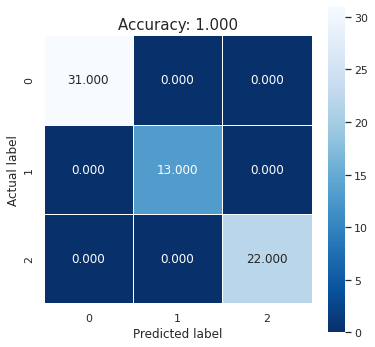

In [ ]:
#Checking performance of the model
from sklearn.metrics import classification_report, confusion_matrix

# Use the best model to make predictions on the test set
predictions = clf.predict(data_test)

# Compute the confusion matrix
cm = confusion_matrix(target_test, predictions)
print(cm)

plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = (f"Accuracy: {accuracy:.3f}")
plt.title(all_sample_title, size = 15)
plt.show()

The diagonal elements of the matrix represent the number of correct predictions, while the off-diagonal elements represent the number of incorrect predictions. As we can see, all predictions have been guessed correctly because the off-diagonal elements are all 0. There is a perfect accuracy of 1 in guessing unseen testing data which means the model is predicting the species of the penguins accurately using culmen length, culmen depth and island.

In [ ]:
# Use the best model to make predictions on the test set
print('CLASSIFICATION REPORT\n')
print(classification_report(target_test, predictions))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        22

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66



*The classification report provides a more detailed summary of the model's performance on each class.*

Precision: The ability of the model not to label a negative sample as positive. The precision for each class:
Adelie: 1.00 (100%), Chinstrap: 1.00 (100%), Gentoo: 1.00 (100%)

Recall: The ability of the model to find all the positive samples. The recall for each class:
Adelie: 1.00 (100%), Chinstrap: 1.00 (100%), Gentoo: 1.00 (100%)

F1-score: A weighted average of precision and recall, where a score of 1 indicates perfect precision and recall, and 0 indicates the worst possible precision and recall. The F1-score for each class:
Adelie: 1.00 (100%), Chinstrap: 1.00 (100%), Gentoo: 1.00 (100%)

Overall, the model has an accuracy of 1 (100%) on the test set, with high precision, recall, and F1-score for each class. It is also key to note that the model is predicting all the species perfectly with this test-train split. Hence this model can be considered excellent in identifying a penguin's species using its culmen length, culmen depth and Island with this split.

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


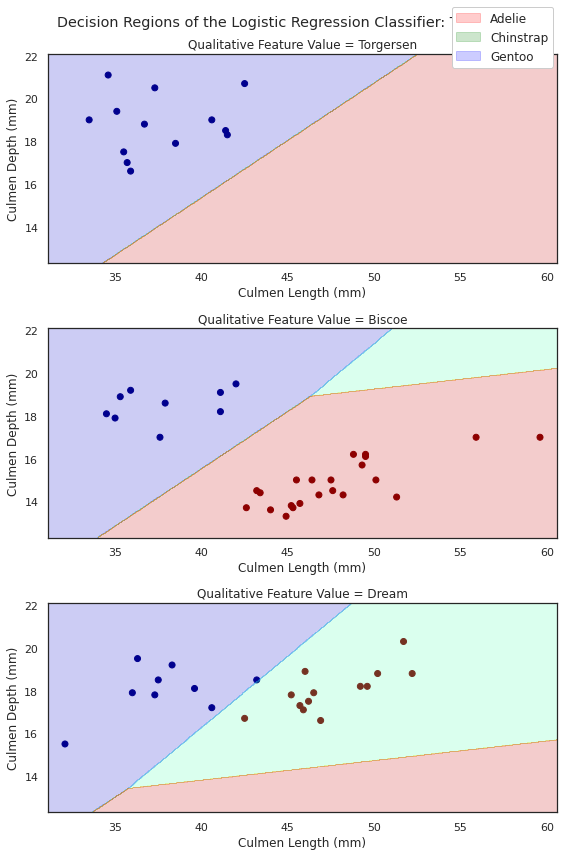

In [ ]:
import matplotlib.patches as mpatches

# plot the decision regions of the classifier
uniqueQualValues = [int(i) for i in np.unique(data_test["Island"])] # as list of integers
fig, ax = plt.subplots(3, figsize = (8,12), sharey = True)
ax= ax.flatten()
# create a meshgrid of the dataset
f1 = data_test["Culmen Length (mm)"]
f2 = data_test["Culmen Depth (mm)"]
grid_x = np.linspace(f1.min()-1,f1.max()+1,501)
grid_y = np.linspace(f2.min()-1,f2.max()+1,501)

f1, f2 = np.meshgrid(grid_x, grid_y)
for i in uniqueQualValues:
    # predict the class of each point in the meshgrid
    Z = clf.predict(np.c_[f1.ravel(), f2.ravel(), np.ones(f1.ravel().shape) * 1.0 * i])
    Z = Z.reshape(f1.shape)

    # plot the test set samples as a scatter plot
    ax[i].scatter(data_test[data_test["Island"]==i]["Culmen Length (mm)"], data_test[data_test["Island"]==i]["Culmen Depth (mm)"], c=target_test[data_test["Island"]==i], cmap='jet')
    # plot the decision regions
    ax[i].contourf(f1, f2, Z, alpha=0.2, cmap='jet')

    ax[i].set_xlabel("Culmen Length (mm)")
    ax[i].set_ylabel("Culmen Depth (mm)")
    if i == 0:
        ax[i].set_title('Qualitative Feature Value = ' + "Torgersen")
    elif i ==1:
        ax[i].set_title('Qualitative Feature Value = ' + "Biscoe")
    elif i ==2:
        ax[i].set_title('Qualitative Feature Value = ' + "Dream")

# Add legend to the figure
legend0 = mpatches.Patch(color='red', label='Adelie', alpha=0.2)
legend1 = mpatches.Patch(color='green', label='Chinstrap', alpha=0.2)
legend2 = mpatches.Patch(color='blue', label='Gentoo', alpha=0.2)
fig.legend(handles=[legend0, legend1, legend2], loc=(0.8,0.92), fontsize='medium', framealpha=1)

plt.suptitle('Decision Regions of the Logistic Regression Classifier: Test Set')
plt.tight_layout()
plt.show()

The graph contains three subplots, each corresponding to a different island to depict the decision regions of the Logistic Regression model. The x and y axes refers to the Culmen Length (mm) and the Culmen Depth (mm) respectively. The scatter points on each subplot represent individual penguins in the test dataset. The color indicating their species (red for Gentoo, green for Chinstrap, and blue for Adelie) as seen in the legend.

On Torgersen Island, the Logistic regression model mainly distinguishes between Adelie and Gentoo penguins. The model creates separate regions for Adelie (blue) and Gentoo (red) species. There is no overlap in scatter points in this graph and all scatter plots are for Adelie pengunis. Although a decision region is created for Gentoo penguins, there are no scatter points present. This region allows us to predict the posibility of Gentoo penguins existing on Torgersen Island. The lack of a green region tells us that Chinstrap penguins can't be found on Torgersen Island.

On Biscoe Island, Gentoo (red) and Adelie (blue) penguins are more prominent. We do notice a small section given to Chinstrap penguins but no scatter points. The existence of 3 decision regions tells us that the model can potentially predict the existence of all 3 species on this island but there is a higher likelyhood of only Gentoo and Adelie penguins being found. There is no overlap in data points and they don't come close to the boundary, this tells us that the model is predicting species accurately.

On Dream Island, all 3 decision regions are found, but the decision boundaries between Chinstrap (green) and Adelie (blue) penguins seem complex. The scatter points are very close to the boundary but are classified correctly. This might indicate that the model has a harder time distinguishing between these two species on Dream Island. Although a decision region is created for Gentoo penguins, there are no scatter points present. This region allows us to predict the posibility of Gentoo penguins existing on Torgersen Island.

Overall, the scatterplot tells us that Adelie penguins are visible on all 3 islands, Gentoo is visible only on Biscoe island and Chinstrap is only on Dream island. The plot does account for a possibility of Gentoo and Chinstrap penguins existing on other island and has hence created decision regions for them on plots where scatter points are not there.

To attempt to avoid overfitting I performed multiple cross validation tests using L2 regularization with a range of C values to find the best hyperparameter, but the accuracy remained high. I believe the reason behind this overfitting is the lack of a large enough dataset, a small number of features used for classification and the simplicity of the logistic regression model. This means that it is important to explore other more complex models to get a better idea of the trends and predictions.

**Model 2: Support Vector Machine (SVM) - Han Zheng**

In [ ]:
# Extracting my features
features = ['Culmen Length (mm)', 'Culmen Depth (mm)', 'Island']
quan_fea = ['Culmen Length (mm)', 'Culmen Depth (mm)']
x_train_svm = train[features]
y_train_svm = train['Species']
X_svm = train[quan_fea]
x_test_svm = test[features]
y_test_svm = test['Species']

In [ ]:
# Cross validation and modeling
from sklearn.model_selection import cross_val_score
from sklearn import svm
best_score = 0

for i in range (1,30):
    SVM = svm.SVC(C = i)
    cv_score = cross_val_score(SVM, x_train_svm, y_train_svm, cv = 10).mean()
    if cv_score > best_score:
        best_c = i
        best_score = cv_score



print("Best Hyperparameter: " + str(best_c))
model = svm.SVC(C = best_c)
model.fit(x_train_svm, y_train_svm)
y_train_pred = model.predict(x_train_svm)
y_test_pred = model.predict(x_test_svm)

Best Hyperparameter: 27


CLASSIFICATION REPORT SVM

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.92      0.96        13
           2       1.00      1.00      1.00        22

    accuracy                           0.98        66
   macro avg       0.99      0.97      0.98        66
weighted avg       0.99      0.98      0.98        66

0.9848484848484849
[[31  0  0]
 [ 1 12  0]
 [ 0  0 22]]


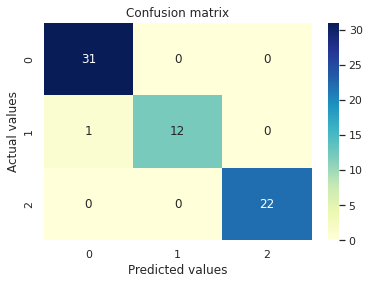

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

print('CLASSIFICATION REPORT SVM\n')
print(classification_report(y_test_svm, y_test_pred))

SVM_acc = accuracy_score(y_test_svm, y_test_pred) # get my accuracy score
print(SVM_acc)

ConfusionMatrix = confusion_matrix(y_test_svm,y_test_pred)
print(ConfusionMatrix)
ax = sns.heatmap(ConfusionMatrix,annot = True, cmap = 'YlGnBu')
ax.set_title('Confusion matrix')
ax.set_xlabel('Predicted values')
ax.set_ylabel('Actual values')

plt.show()

Based on the classification report of the SVM classifier, the model demonstrates impressive performance in predicting penguin species using the selected morphological features. The accuracy score of 0.985 indicates that the classifier is able to correctly predict the species of penguins for 98.5% of the test dataset, which is an excellent result.

Analyzing the precision, recall, and F1-scores for each species, we can observe that the classifier performs exceptionally well for species 0 (Adelie) and 2 (Gentoo), with perfect or near-perfect scores in all categories. For species 1 (Chinstrap), the precision score is perfect (1.0), which means that all instances predicted as Chinstrap were indeed Chinstrap. However, the recall score of 0.92 for species 1 suggests that there is a small number of Chinstrap instances that were misclassified, possibly as Adelie penguins, given that there is one false negative for species 1 in the confusion matrix.

The confusion matrix further confirms the strong performance of the SVM classifier, with most of the predictions falling along the diagonal, which represents correct predictions. The classifier made only one error, misclassifying a Chinstrap penguin as an Adelie penguin.

In conclusion, the SVM classifier demonstrates excellent performance in predicting penguin species based on the selected morphological features, with high accuracy and F1-scores across all species. The model's strong performance suggests that the chosen features are highly informative for distinguishing between different penguin species.

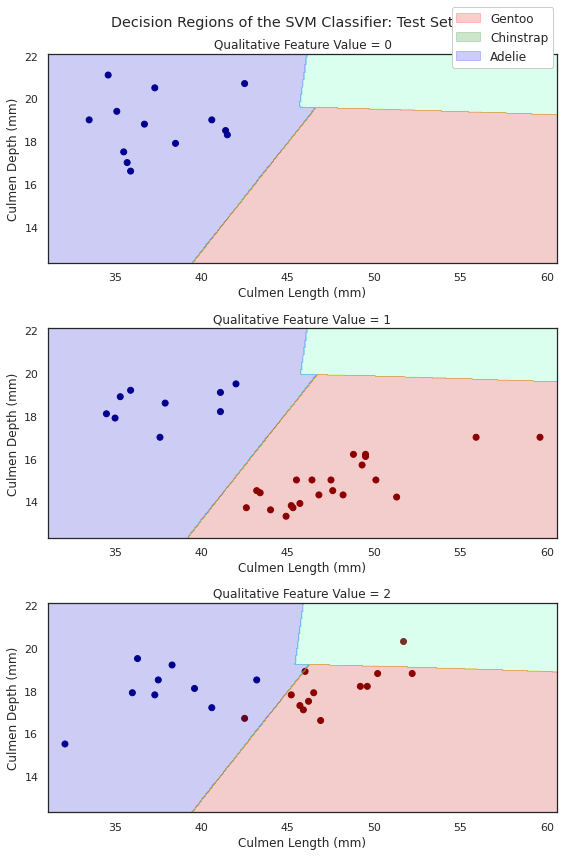

In [ ]:
from sklearn.svm import SVC
import matplotlib.patches as mpatches
# Create and train the SVM classifier
# Create dummy variables for the 'Island' variable
train_dummies = pd.get_dummies(train["Island"], prefix="Island", drop_first=False)
test_dummies = pd.get_dummies(test["Island"], prefix="Island", drop_first=False)

# Concatenate dummy variables with the original data
x_train_svm = pd.concat([train[quan_fea], train_dummies], axis=1)
x_test_svm = pd.concat([test[quan_fea], test_dummies], axis=1)

# Train the SVM model
svm_model = SVC()
svm_model.fit(x_train_svm, y_train_svm)

# Create a meshgrid
f1 = x_test_svm["Culmen Length (mm)"]
f2 = x_test_svm["Culmen Depth (mm)"]
grid_x = np.linspace(f1.min() - 1, f1.max() + 1, 501)
grid_y = np.linspace(f2.min() - 1, f2.max() + 1, 501)

f1, f2 = np.meshgrid(grid_x, grid_y)

# Plot the decision regions
fig, ax = plt.subplots(3, figsize=(8, 12), sharey=True)
ax = ax.flatten()

uniqueQualValues = [int(i) for i in np.unique(test["Island"])]

for i, island_name in enumerate(train_dummies.columns):
    predict_data = np.c_[f1.ravel(), f2.ravel()]
    predict_df = pd.DataFrame(predict_data, columns=quan_fea)

    island_dummy = np.zeros((len(predict_data), len(train_dummies.columns)))
    island_dummy[:, i] = 1
    island_dummy_df = pd.DataFrame(island_dummy, columns=train_dummies.columns)
    predict_df = pd.concat([predict_df, island_dummy_df], axis=1)

    Z = svm_model.predict(predict_df)
    Z = Z.reshape(f1.shape)

    ax[i].scatter(x_test_svm[test["Island"] == uniqueQualValues[i]]["Culmen Length (mm)"],
                  x_test_svm[test["Island"] == uniqueQualValues[i]]["Culmen Depth (mm)"],
                  c=y_test_svm[test["Island"] == uniqueQualValues[i]], cmap = 'jet')

    ax[i].contourf(f1, f2, Z, alpha=0.2, cmap = 'jet')

    ax[i].set_xlabel("Culmen Length (mm)")
    ax[i].set_ylabel("Culmen Depth (mm)")
    ax[i].set_title('Qualitative Feature Value = ' + island_name.split("_")[1])

legend0 = mpatches.Patch(color='red', label='Gentoo', alpha=0.2)
legend1 = mpatches.Patch(color='green', label='Chinstrap', alpha=0.2)
legend2 = mpatches.Patch(color='blue', label='Adelie', alpha=0.2)
fig.legend(handles=[legend0, legend1, legend2], loc=(0.8, 0.92), fontsize='medium', framealpha=1)

plt.suptitle('Decision Regions of the SVM Classifier: Test Set')
plt.tight_layout()
plt.show()


In [ ]:
chinstrap_penguins = penguins[penguins['Species'] == "Chinstrap"]
print(chinstrap_penguins['Island'].value_counts())


Dream    67
Name: Island, dtype: int64


This graph visualizes the decision regions of a Support Vector Machine (SVM) classifier applied to a dataset of penguin features.

In the graph, you can see three subplots, each corresponding to a different island. The x-axis represents the Culmen Length (in millimeters), and the y-axis represents the Culmen Depth (in millimeters). The scatter points on each subplot represent individual penguins in the test dataset, with their color indicating their actual species (red for Gentoo, green for Chinstrap, and blue for Adelie).

From the graph, you can observe the following:

On Torgersen Island, the SVM classifier mainly distinguishes between Adelie
and Chinstrap penguins, with very few Gentoo penguins observed. The classifier creates separate regions for Adelie (blue) and Chinstrap (green) species.

On Biscoe Island, Gentoo (red) and Adelie (blue) penguins are more prominent. The classifier creates well-separated regions for these two species, with some overlap between them.

On Dream Island, the classifier differentiates between all three species, but the decision boundaries appear to be more complex, especially between Chinstrap (green) and Adelie (blue) penguins. This might indicate that the classifier has a harder time distinguishing between these two species on Dream Island.

In summary, the decision regions show that the classifier can differentiate between the species to some extent, but there might be some overlap between the species, especially on Dream Island.

I also noticed that there are 68 Chinstrap penguins in the entire dataset, all of which are found on Dream Island. This explains why you don't see any green dots (representing Chinstrap) in the subplots for Torgersen and Biscoe islands.

**K-Nearest Neighbour Classifier Model** - Nitya Khanna

In [ ]:
#importing needed libraries
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import patches as mpatches

In [ ]:
#Creating train and test dataframes based on exhaustive feature selection done previously
X_train_knn = train[["Island","Culmen Length (mm)", "Culmen Depth (mm)"]]
Y_train_knn = train["Species"]

X_test_knn = test[["Island","Culmen Length (mm)", "Culmen Depth (mm)"]]
Y_test_knn = test["Species"]

Best Hyperparameter:  2
Best Accuracy Score:  0.9846153846153847


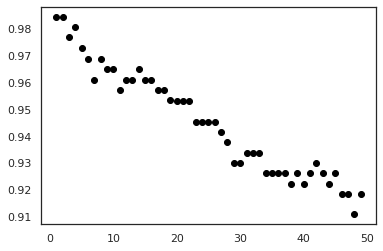

In [ ]:
#K Nearest Neighbors Classifier Model
best_score = 0
fig, ax = plt.subplots(1)
#conducting cross validation to find the best depth for the model
for d in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = d)
    cv_score = cross_val_score(knn, X_train_knn, Y_train_knn, cv=10).mean()
    #plotting different CV Scores
    ax.scatter(d, cv_score, color = "black")
    #choosing Best Depth based on the best CV score
    if cv_score >= best_score:
        best_depth = d
        best_score = cv_score
print("Best Hyperparameter: ", best_depth)
print("Best Accuracy Score: ", best_score)

Here, I have tested the K- Nearest Neighbor Classifier model at every depth level from 1-50, and checked the mean for the cv score for each level. I have also plotted all the depths and their corresponding cv mean scores to visually see the relation between the increase in depth and the cv score.

Through this I found that the best depth/Hyperparameter for the model is 2, with the highest mean cv score of 0.984615.

This means that the KNN model of depth 2 predicts the right penguin species about 98.46% of the times on average.

In [ ]:
#Modelling the data using KNN model
knn = KNeighborsClassifier(n_neighbors = best_depth)
knn.fit(X_train_knn, Y_train_knn)
acc_score = knn.score(X_test_knn, Y_test_knn)

print("Accuracy Score of the model: " , acc_score)

Accuracy Score of the model:  0.9848484848484849


          Predicted 0  Predicted 1  Predicted 2
Actual 0           31            0            0
Actual 1            0           13            0
Actual 2            0            1           21


Text(39.5, 0.5, 'Truth')

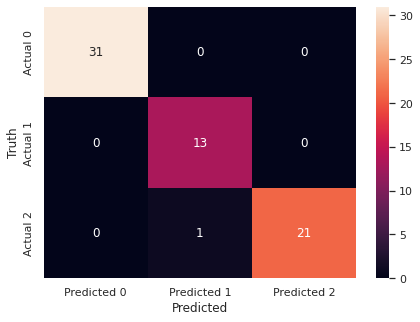

In [ ]:
#Checking performace of the model

#Computing predictions using knn model with the best depth
Y_pred = knn.predict(X_test_knn)

#Confusion Matrix
cm = pd.DataFrame(confusion_matrix(Y_test_knn, Y_pred),
                    index = ['Actual ' + str(i) for i in np.unique(Y_test_knn)],
                    columns = ['Predicted ' + str(i) for i in np.unique(Y_test_knn)])
print(cm)

#plot heatmap of the confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")


In [ ]:
#Classification Report of the model
print('CLASSIFICATION REPORT\n')
print(classification_report(Y_test_knn, Y_pred))

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.93      1.00      0.96        13
           2       1.00      0.95      0.98        22

    accuracy                           0.98        66
   macro avg       0.98      0.98      0.98        66
weighted avg       0.99      0.98      0.98        66



Based on the accuracy score, confusion matrix, and classification report of the KNN classifier, the model demonstrates impressive performance in predicting penguin species using the selected quantitative and qualitative features. The accuracy score of 0.9848 indicates that the classifier is able to correctly predict the species of penguins for 98.48% of the test dataset.

The confusion matrix further confirms the strong performance of the KNN classifier, with all but 1 of the predictions being correct, i.e. falling along the diagonal. The classifier made only one error, misclassifying a Gentoo penguin as a Chinstrap penguin. Other than that, the model correctly classified all 31 Adelie, 13 Chinstrap, and 21 Gentoo penguins.

As we analyze the Classification Report, we can see that the model has 1.00 precision score for Adelie and Gentoo penguins, this means that the model correctly identifies these penguins 100% of the time, the precision score for Chinstrap penguins is 0.93 which is also high, thus showing the accuracy of the model for all penguins. The recall and f1-scores for all the penguins are perfect or near perfect, indicating that the model works very well. However, the recall score of 0.95 for species 2 suggests that there are a small number of Gentoo penguins that were misclassified, and we know from the confusion matrix that 1 Gentoo penguin was mislabeled as Chinstrap.

In conclusion, the KNN classifier demonstrates excellent performance in predicting penguin species based on the selected morphological features, with high accuracy scores, the near perfect confusion matrix and high precision, recall, and F1 scores in the classification report. The model's strong performance suggests that the chosen features are highly informative for distinguishing between different penguin species.

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


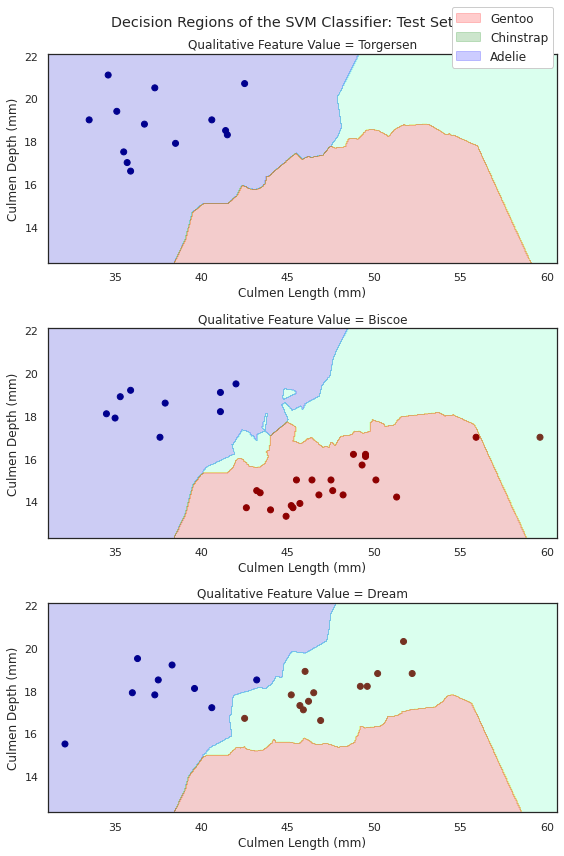

In [ ]:
# plot the decision regions of the classifier
uniqueQualValues = [int(i) for i in np.unique(X_test_knn["Island"])] # as list of integers
fig, ax = plt.subplots(3, figsize = (8,12), sharey = True)
ax= ax.flatten()
# create a meshgrid of the dataset
f1 = X_test_knn["Culmen Length (mm)"]
f2 = X_test_knn["Culmen Depth (mm)"]
grid_x = np.linspace(f1.min()-1,f1.max()+1,501)
grid_y = np.linspace(f2.min()-1,f2.max()+1,501)

f1, f2 = np.meshgrid(grid_x, grid_y)
for i in uniqueQualValues:
    # predict the class of each point in the meshgrid
    Z = knn.predict(np.c_[np.ones(f1.ravel().shape) * 1.0 * i, f1.ravel(), f2.ravel()])
    Z = Z.reshape(f1.shape)

    ax[i].scatter(X_test_knn[X_test_knn["Island"]==i]["Culmen Length (mm)"], X_test_knn[X_test_knn["Island"]==i]["Culmen Depth (mm)"], c=Y_test_knn[X_test_knn["Island"]==i], cmap='jet') # plot the test set samples as a scatter plot

    ax[i].contourf(f1, f2, Z, alpha=0.2, cmap='jet') # plot the decision regions

    ax[i].set_xlabel("Culmen Length (mm)")
    ax[i].set_ylabel("Culmen Depth (mm)")
    if i == 0:
      ax[i].set_title('Qualitative Feature Value = ' + "Torgersen")
    elif i ==1:
      ax[i].set_title('Qualitative Feature Value = ' + "Biscoe")
    elif i ==2:
      ax[i].set_title('Qualitative Feature Value = ' + "Dream")


legend0 = mpatches.Patch(color = 'red', label = 'Gentoo', alpha = 0.2)
legend1 = mpatches.Patch(color = 'green', label = 'Chinstrap', alpha = 0.2)
legend2 = mpatches.Patch(color = 'blue', label = 'Adelie', alpha = 0.2)
fig.legend(handles = [legend0, legend1, legend2],loc = (0.8,0.92), fontsize = 'medium',framealpha = 1)

plt.suptitle('Decision Regions of the SVM Classifier: Test Set')
plt.tight_layout()
plt.show()

This graph visualizes the decision regions of a K-Nearest Neighbor Classifier applied to a dataset of penguin features.
In the graph, you can see three subplots, each corresponding to a different island. The x-axis represents the Culmen Length (mm), and the y-axis represents the Culmen Depth (mm). The scatter points on each subplot represent individual penguins in the test dataset, with their color indicating their actual species.

From the graph, you can observe the following:
On Torgersen Island, the KNN classifier correctly labels all the Adelie penguins as all the penguins lie within the blue decision regiom of Adelie.

On Biscoe Island, there are only Gentoo (red) and Adelie (blue) penguins present. The classifier is able to correctly predict almost all the pengiuns as Gentoo and Adelie, however, one Gentoo penguin lays outside the Gentoo decision region, in the Chinstrap decision region, so the classifier mislabels it as Chinstrap. The decision boundaries on Biscoe Island are also more complex than the other two. This might indicate that the classifier has a harder time distinguishing between the three species on Biscoe Island.

On Dream Island, the classifier differentiates between Adelie and Chinstrap, and correctly labels all the penguins.

In summary, the decision regions show that the classifier can differentiate between the species to some extent, but there might be some overlap between the species, especially on Biscoe Island.

The decision regions also show that apart from Adelie, no penguin species is present on all the islands.

## **Discussion of the Models**

**Discussion of the Logistic Regression Model**

This analysis uses a Logistic Regression Model to predict the species of a penguin based on it's Culmen Length, Culmen Depth and Island. The data was first pre-processed by selecting the desired features and splitting it into a train and test set. Cross-validation testing was then conducted to find an optimal hyperparameter value for regularization strength (C). The value of 100 was selected which gave an accuracy of 1.0 = 100%.

The performance of the model was evaluated using a confusion matrix and a classification report. The accuracy of 1.0 translated to a perfect confusion matrix because the off-diagonal elements are all 0 which translated to all the predictions of classifying species being correct. The classification report also had perfect precision, recall and f1-score for all 3 species which indicated strong performance by the model to correctly guess the species. However this also brings up a key limitation of overfitting.

The decision regions depict patterns in the distribution of species using Culmen Length and Culmen Depth on each Island. The model was able to successfully classify species on each island.

Overall the model was effective in predicting penguin species using Culmen Length, Culmen Depth and Island. All analytical features used depict a 100% accuracy in classification. This could lend to 2 conclusions; either the model is perfect or there is a chance of overfitting, which means that it is learning the training data too well and may not generalize well to new, unseen data.

To attempt to avoid overfitting I performed multiple cross validation tests using L2 regularization with a range of C values to find the best hyperparameter, but the accuracy remained high. I believe the reason behind this overfitting is the lack of a large enough dataset, a small number of features used for classification and the simplicity of the logistic regression model. This means that it is important to explore other more complex models to get a better idea of the trends and predictions.

**Discussion of the Support Vector Machine (SVM) Model**

In this study, an SVM classifier was employed to predict penguin species based on morphological features, specifically Culmen Length, Culmen Depth, and Island location. The analysis began with data preprocessing, which involved encoding categorical features and splitting the dataset into training and testing sets. A cross-validation approach was used to optimize the hyperparameter C for the SVM classifier, resulting in a selection of C=27.

The decision region plots generated for each Island location revealed distinctive patterns in species distribution based on the selected features. The classifier managed to effectively distinguish between species in most cases, with the decision boundaries appearing to closely follow the observed distributions. It should be noted that green dots, representing Chinstrap penguins, were not present in the Dream Island plot because there were no Chinstrap penguins in that Island location in the test dataset.

The performance of the SVM classifier was further evaluated using a confusion matrix and classification report. With an accuracy of 0.985, the classifier demonstrated exceptional prediction capabilities. The precision, recall, and F1-scores for each species were also high, indicating strong performance across all species. The confusion matrix revealed only one misclassification, wherein a Chinstrap penguin was predicted as an Adelie penguin.

In summary, the SVM classifier proved highly effective in predicting penguin species based on the chosen morphological features. The decision region plots, confusion matrix, and classification report all indicate a high degree of success in species classification. The results suggest that the selected features provide meaningful information for distinguishing between penguin species.

**Discussion of the KNN Model**

In this study, a KNN classifier was employed to predict penguin species based on 2 quantitative features, specifically their Culmen Length, Culmen Depth, and 1 qualitative feature, specifically their Island location. The analysis began with data preprocessing, which involved encoding categorical features and splitting the dataset into training and testing sets. After conducting exhaustive feature selection, we chose the features mentioned above for the model.

First, I conducted cross validation on the training data to choose the best value for the hyperparameter, which was 2, resulting in an accuracy score of 0.984.

I, then, trained the model and computed the predictions for the test data using the hyperparameter calculated earlier.

The analysis of the model shows that it is fairly accurate in predicting the correct species of the penguins based on the 3 features we selected. The decision region plots generated for each Island location revealed distinctive patterns in species distribution based on the selected features.

The classifier managed to effectively distinguish between species in most cases, with the decision boundaries appearing to closely follow the observed distributions. It should be noted that according to the graphs, Biscoe and Dream Islands didn't have any Chinstrao and Gentoo penguins respectively. Additionally Torgersen Island only had Adelie penguins. This pattern is because the test dataset was divided in such a way that this distribution was created.  

The performance of the KNN classifier was further evaluated using a confusion matrix and classification report. With an accuracy of 0.9848, the classifier demonstrated exceptional prediction capabilities. The precision, recall, and F1-scores for each species were also high, indicating strong performance across all species. The confusion matrix revealed only one misclassification.

In summary, the KNN classifier proved highly effective in predicting penguin species based on the chosen morphological features. The results suggest that the selected features provide meaningful information for distinguishing between penguin species.

**Conclusion**

In this study, three different machine learning models—Logistic Regression, SVM, and KNN—were employed to predict penguin species based on morphological features: Culmen Length, Culmen Depth, and Island location. The choice of these features was based on our feature selection function.

The performance of each model was assessed using classification reports and confusion matrices. The Logistic Regression model achieved perfect accuracy, precision, recall, and F1-scores, with no misclassifications in the test dataset. However, perfect accuracy might indicate the possibility of overfitting, especially considering the small dataset size and limited number of features. The SVM classifier demonstrated high performance as well, with an accuracy of 0.985 and similarly high precision, recall, and F1-scores. There was only one misclassification, where a Chinstrap penguin was predicted as an Adelie penguin. Lastly, the KNN model also displayed strong performance, with an accuracy of 0.985 and high precision, recall, and F1-scores. In this case, one Gentoo penguin was misclassified as a Chinstrap penguin.

Given the possibility of overfitting in the Logistic Regression model, the SVM and KNN models are recommended as more suitable choices for this dataset. Both models demonstrated excellent performance and can effectively predict penguin species based on the selected morphological features.

The decision to use the selected features—Culmen Length, Culmen Depth, and Island location—proved to be beneficial for accurate species prediction, as evidenced by the strong performance of all three models. These features allowed the classifiers to effectively distinguish between species, highlighting their importance in the classification process.

One limitation of this study is the relatively small size of the dataset, which may have contributed to the high accuracy scores achieved by all three models. While the models performed well on this dataset, it is possible that their performance could differ when applied to larger datasets or those with more diverse features. Future work could involve the exploration of additional features, fine-tuning of model hyperparameters, or testing the models on larger datasets to further assess their performance and generalizability.

In conclusion, this project demonstrated the effectiveness of different machine learning models for predicting penguin species based on morphological features. The selected features played a significant role in achieving high classification performance. The SVM and KNN models are recommended as the most suitable choices, while the perfect accuracy of the Logistic Regression model should be interpreted with caution due to the possibility of overfitting. Despite the limitations posed by the small dataset, this study provides valuable insights into the potential of machine learning for species classification based on morphological data.